In [10]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [3]:

# date = datetime.now().strftime("%Y%m%d")
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan', 'magenta', 'olive', 'maroon', 'navy', 'aqua', 'teal']
# Find datafile
file = 'Rphenograph_output_275clusters_k250_16ct_fractions.csv'
# pi = pd.read_excel('Data/raw/LUAD Clinical Data.xlsx')


# Get current directory
current_directory = os.getcwd()
data_path = current_directory + '/Data/'

df = pd.read_csv(f"{data_path}clustered/{file}", index_col=0)
df

,Patient_ID,source_ID,source_cluster,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,...,Mast.cell,NK.cell,Neutrophils,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown,cluster
1,LUAD_D001,D001_0,Cancer,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.000000,1
2,LUAD_D001,D001_1,Tc,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.285714,0.000000,0.428571,2
3,LUAD_D001,D001_10,Th,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,...,0.090909,0.0,0.000000,0.0,0.000000,0.181818,0.090909,0.000000,0.000000,3
4,LUAD_D001,D001_100,Cancer,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,4
5,LUAD_D001,D001_1000,Treg,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,...,0.000000,0.0,0.083333,0.0,0.083333,0.083333,0.250000,0.000000,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637718,LUAD_D416,D416_995,Unknown,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.166667,44
1637719,LUAD_D416,D416_996,Cl MAC,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,...,0.200000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,72
1637720,LUAD_D416,D416_997,Cancer,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.333333,146
1637721,LUAD_D416,D416_998,Cl MAC,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.166667,1


In [9]:
df

,Patient_ID,source_ID,source_cluster,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,...,Mast.cell,NK.cell,Neutrophils,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown,cluster
1,LUAD_D001,D001_0,Cancer,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.000000,1
2,LUAD_D001,D001_1,Tc,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.285714,0.000000,0.428571,2
3,LUAD_D001,D001_10,Th,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,...,0.090909,0.0,0.000000,0.0,0.000000,0.181818,0.090909,0.000000,0.000000,3
4,LUAD_D001,D001_100,Cancer,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,4
5,LUAD_D001,D001_1000,Treg,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,...,0.000000,0.0,0.083333,0.0,0.083333,0.083333,0.250000,0.000000,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637718,LUAD_D416,D416_995,Unknown,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.166667,44
1637719,LUAD_D416,D416_996,Cl MAC,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,...,0.200000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,72
1637720,LUAD_D416,D416_997,Cancer,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.333333,146
1637721,LUAD_D416,D416_998,Cl MAC,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.166667,1


In [72]:
data

,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,Int.Mo,Mast.cell,NK.cell,Neutrophils,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown,cluster
1,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.000000,1
2,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.285714,0.000000,0.428571,2
3,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,0.0,0.090909,0.0,0.000000,0.0,0.000000,0.181818,0.090909,0.000000,0.000000,3
4,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,4
5,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,0.0,0.000000,0.0,0.083333,0.0,0.083333,0.083333,0.250000,0.000000,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637718,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.166667,44
1637719,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,0.0,0.200000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,72
1637720,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.333333,146
1637721,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.166667,1


In [73]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'data_df' is your DataFrame with 17 features and a 'cluster' column
# Drop the 'cluster' column to calculate similarity between clusters
features_df = data.drop(columns=['cluster'])

# Group the DataFrame by the 'cluster' column and aggregate the features
cluster_groups = features_df.groupby('cluster').agg(lambda x: list(x))

# Function to calculate similarity between two clusters
def calculate_similarity(cluster1, cluster2):
    # Convert clusters to numpy arrays
    cluster1_array = np.array(cluster1)
    cluster2_array = np.array(cluster2)
    
    # Euclidean distance
    euclidean_dist = euclidean(cluster1_array.flatten(), cluster2_array.flatten())

    # Pearson correlation coefficient
    pearson_corr, _ = pearsonr(cluster1_array.flatten(), cluster2_array.flatten())

    # Cosine similarity
    cosine_sim = cosine_similarity(cluster1_array, cluster2_array).mean()
    
    return euclidean_dist, pearson_corr, cosine_sim

# Dictionary to store similarity measures for each pair of clusters
similarity_dict = {}

# Iterate over each pair of clusters
for cluster1, features1 in cluster_groups.iterrows():
    for cluster2, features2 in cluster_groups.iterrows():
        if cluster1 != cluster2:  # Avoid comparing a cluster with itself
            similarity_dict[(cluster1, cluster2)] = calculate_similarity(features1, features2)

# Print similarity measures for each pair of clusters
for (cluster1, cluster2), similarity in similarity_dict.items():
    print(f"Similarity between Cluster {cluster1} and Cluster {cluster2}:")
    print("Euclidean distance:", similarity[0])
    print("Pearson correlation coefficient:", similarity[1])
    print("Cosine similarity:", similarity[2])
    print()


KeyError: 'cluster'

In [14]:
data = df.iloc[:, 3:]
cluster_centroids = data.groupby('cluster').mean()
cluster_centroids

,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,Int.Mo,Mast.cell,NK.cell,Neutrophils,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown
cluster,,,,,,,,,,,,,,,,,
1,0.085663,0.010717,0.040616,0.143817,0.062591,0.002432,0.131348,0.015393,0.011515,0.003445,0.034961,0.022557,0.034208,0.117220,0.141745,0.025527,0.116247
2,0.003646,0.003702,0.334013,0.002275,0.003273,0.000574,0.002638,0.002528,0.003647,0.002055,0.003128,0.004897,0.003203,0.002035,0.420507,0.004465,0.203414
3,0.012124,0.010918,0.326119,0.089795,0.028495,0.000671,0.135682,0.007079,0.008431,0.002074,0.027054,0.014065,0.021714,0.099835,0.129510,0.017051,0.069384
4,0.000000,0.000000,0.712945,0.000000,0.000000,0.000946,0.143528,0.000095,0.000063,0.000386,0.000000,0.000000,0.000000,0.000060,0.000129,0.000060,0.141788
5,0.015474,0.238088,0.012543,0.067240,0.019961,0.001229,0.067673,0.002951,0.005538,0.002372,0.011482,0.005413,0.019075,0.135105,0.312429,0.029650,0.053776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0.000000,0.000000,0.846152,0.000000,0.000000,0.000000,0.153848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
272,0.000000,0.000000,0.941716,0.000000,0.000000,0.000000,0.000072,0.000000,0.000000,0.000000,0.000000,0.000078,0.000072,0.000000,0.057989,0.000074,0.000000
273,0.000000,0.000000,0.937389,0.000000,0.000111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000111,0.000000,0.062389,0.000000,0.000000,0.000000


In [63]:
data

,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,Int.Mo,Mast.cell,NK.cell,Neutrophils,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown,cluster
1,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.000000,1
2,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.285714,0.000000,0.428571,2
3,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,0.0,0.090909,0.0,0.000000,0.0,0.000000,0.181818,0.090909,0.000000,0.000000,3
4,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,4
5,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,0.0,0.000000,0.0,0.083333,0.0,0.083333,0.083333,0.250000,0.000000,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637718,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.166667,44
1637719,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,0.0,0.200000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,72
1637720,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.333333,146
1637721,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.166667,1


In [67]:
grouped_stats

,cluster,Alt.MAC_mean,Alt.MAC_std,B.cell_mean,B.cell_std,Cancer_mean,Cancer_std,Cl.MAC_mean,Cl.MAC_std,Cl.Mo_mean,...,T.other_mean,T.other_std,Tc_mean,Tc_std,Th_mean,Th_std,Treg_mean,Treg_std,Unknown_mean,Unknown_std
0,1,0.085663,0.121971,0.010717,0.032180,0.040616,0.086633,0.143817,0.153290,0.062591,...,0.034208,0.078330,0.117220,0.138640,0.141745,0.140416,0.025527,0.057493,0.116247,0.157189
1,2,0.003646,0.017815,0.003702,0.017148,0.334013,0.115042,0.002275,0.012323,0.003273,...,0.003203,0.015012,0.002035,0.011645,0.420507,0.141813,0.004465,0.019297,0.203414,0.220399
2,3,0.012124,0.034187,0.010918,0.032881,0.326119,0.151223,0.089795,0.103342,0.028495,...,0.021714,0.050108,0.099835,0.113690,0.129510,0.124812,0.017051,0.043600,0.069384,0.107699
3,4,0.000000,0.000000,0.000000,0.000000,0.712945,0.005307,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000060,0.001654,0.000129,0.002511,0.000060,0.001654,0.141788,0.014187
4,5,0.015474,0.038545,0.238088,0.216311,0.012543,0.031777,0.067240,0.095632,0.019961,...,0.019075,0.043433,0.135105,0.130304,0.312429,0.201280,0.029650,0.053691,0.053776,0.102470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,271,0.000000,0.000000,0.000000,0.000000,0.846152,0.000542,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
271,272,0.000000,0.000000,0.000000,0.000000,0.941716,0.005529,0.000000,0.000000,0.000000,...,0.000072,0.001660,0.000000,0.000000,0.057989,0.005453,0.000074,0.001726,0.000000,0.000000
272,273,0.000000,0.000000,0.000000,0.000000,0.937389,0.001521,0.000000,0.000000,0.000111,...,0.000000,0.000000,0.062389,0.001521,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
273,274,0.000000,0.000000,0.084654,0.013075,0.914201,0.013819,0.000000,0.000000,0.000074,...,0.000000,0.000000,0.000000,0.000000,0.000045,0.001319,0.000000,0.000000,0.000461,0.005471


In [69]:
grouped_mean = data.groupby('cluster').agg('mean')
grouped_std = data.groupby('cluster').agg('std')

# Renaming columns for clarity
# grouped_stats.columns = [f'{col}_{stat}' for col, stat in grouped_stats.columns]

# Resetting index for easy merging later
grouped_std.reset_index(inplace=True)

# # Merging statistics back to the original DataFrame
# merged_df = pd.merge(data, grouped_stats, on='cluster', how='left')

grouped_std

,cluster,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,Int.Mo,Mast.cell,NK.cell,Neutrophils,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown
0,1,0.121971,0.032180,0.086633,0.153290,0.103961,0.023422,0.167704,0.050877,0.044009,0.020667,0.084224,0.058226,0.078330,0.138640,0.140416,0.057493,0.157189
1,2,0.017815,0.017148,0.115042,0.012323,0.015783,0.007666,0.013341,0.016316,0.019156,0.015485,0.016546,0.022056,0.015012,0.011645,0.141813,0.019297,0.220399
2,3,0.034187,0.032881,0.151223,0.103342,0.061137,0.008615,0.127728,0.031387,0.033241,0.014574,0.066913,0.041867,0.050108,0.113690,0.124812,0.043600,0.107699
3,4,0.000000,0.000000,0.005307,0.000000,0.000000,0.011595,0.002653,0.002600,0.001733,0.005291,0.000000,0.000000,0.000000,0.001654,0.002511,0.001654,0.014187
4,5,0.038545,0.216311,0.031777,0.095632,0.048252,0.010822,0.101390,0.016696,0.023754,0.014705,0.034990,0.022889,0.043433,0.130304,0.201280,0.053691,0.102470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,271,0.000000,0.000000,0.000542,0.000000,0.000000,0.000000,0.000542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
271,272,0.000000,0.000000,0.005529,0.000000,0.000000,0.000000,0.001660,0.000000,0.000000,0.000000,0.000000,0.001798,0.001660,0.000000,0.005453,0.001726,0.000000
272,273,0.000000,0.000000,0.001521,0.000000,0.002155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002155,0.000000,0.001521,0.000000,0.000000,0.000000
273,274,0.000000,0.013075,0.013819,0.000000,0.002144,0.002018,0.000000,0.000000,0.002287,0.004179,0.002693,0.000000,0.000000,0.000000,0.001319,0.000000,0.005471


In [76]:
grouped_std.mean()

cluster             138.000000
Alt.MAC               0.007262
B.cell                0.005738
Cancer                0.028856
Cl.MAC                0.017393
Cl.Mo                 0.006157
DCs.cell              0.003217
Endothelial.cell      0.008951
Int.Mo                0.005207
Mast.cell             0.004378
NK.cell               0.004805
Neutrophils           0.006679
Non.Cl.Mo             0.005393
T.other               0.005415
Tc                    0.008920
Th                    0.009239
Treg                  0.006285
Unknown               0.028558
dtype: float64

In [74]:
grouped_std.max()

cluster             275.000000
Alt.MAC               0.185256
B.cell                0.216311
Cancer                0.290328
Cl.MAC                0.251206
Cl.Mo                 0.229951
DCs.cell              0.083017
Endothelial.cell      0.263228
Int.Mo                0.096990
Mast.cell             0.122694
NK.cell               0.164245
Neutrophils           0.257701
Non.Cl.Mo             0.137503
T.other               0.099981
Tc                    0.163909
Th                    0.201280
Treg                  0.121112
Unknown               0.292415
dtype: float64

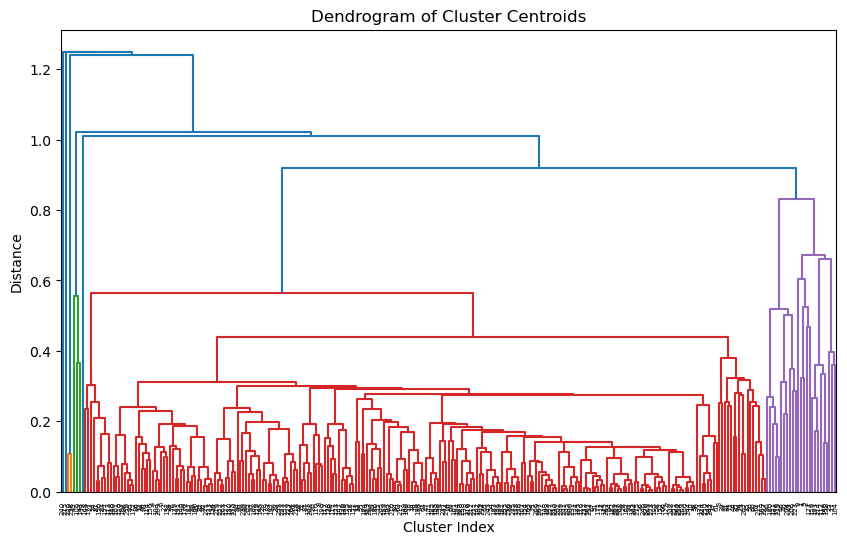

In [18]:

# Compute cluster centroids (average expression profile for each cluster)
cluster_centroids = data.groupby('cluster').mean()

# Perform hierarchical clustering on cluster centroids
linkage_matrix = linkage(cluster_centroids, method='average', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=cluster_centroids.index)
plt.title('Dendrogram of Cluster Centroids')
plt.xlabel('Cluster Index')
plt.ylabel('Distance')
plt.show()


In [25]:
cluster_centroids

,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,Int.Mo,Mast.cell,NK.cell,Neutrophils,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown
cluster,,,,,,,,,,,,,,,,,
1,0.085663,0.010717,0.040616,0.143817,0.062591,0.002432,0.131348,0.015393,0.011515,0.003445,0.034961,0.022557,0.034208,0.117220,0.141745,0.025527,0.116247
2,0.003646,0.003702,0.334013,0.002275,0.003273,0.000574,0.002638,0.002528,0.003647,0.002055,0.003128,0.004897,0.003203,0.002035,0.420507,0.004465,0.203414
3,0.012124,0.010918,0.326119,0.089795,0.028495,0.000671,0.135682,0.007079,0.008431,0.002074,0.027054,0.014065,0.021714,0.099835,0.129510,0.017051,0.069384
4,0.000000,0.000000,0.712945,0.000000,0.000000,0.000946,0.143528,0.000095,0.000063,0.000386,0.000000,0.000000,0.000000,0.000060,0.000129,0.000060,0.141788
5,0.015474,0.238088,0.012543,0.067240,0.019961,0.001229,0.067673,0.002951,0.005538,0.002372,0.011482,0.005413,0.019075,0.135105,0.312429,0.029650,0.053776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0.000000,0.000000,0.846152,0.000000,0.000000,0.000000,0.153848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
272,0.000000,0.000000,0.941716,0.000000,0.000000,0.000000,0.000072,0.000000,0.000000,0.000000,0.000000,0.000078,0.000072,0.000000,0.057989,0.000074,0.000000
273,0.000000,0.000000,0.937389,0.000000,0.000111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000111,0.000000,0.062389,0.000000,0.000000,0.000000


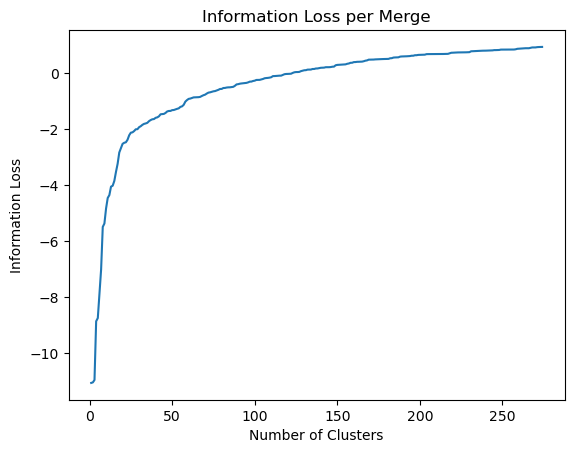

In [61]:

from scipy.spatial.distance import pdist

# Example protein marker expression data (rows: cells, columns: markers)
# protein_expression_data = np.random.rand(10, 16)  # Example dataset of 10 cells and 16 markers

# Calculate pairwise distances between cells using Euclidean distance
pairwise_distances = pdist(cluster_centroids)

# Perform hierarchical clustering to obtain linkage matrix
linkage_matrix = linkage(pairwise_distances, method='average')

# Compute the distance or similarity metric for each merge
merge_distances = linkage_matrix[:, 2]  # Distance/similarity metric is stored in the third column of the linkage matrix

# Calculate information loss metric (e.g., decrease in variance)
# Example: Information loss metric is the change in variance after each merge
initial_variance = np.var(pairwise_distances)
information_loss = [(initial_variance - variance_after_merge) / initial_variance for variance_after_merge in merge_distances]

# Plot the information loss against the number of clusters
num_clusters = range(len(merge_distances), 0, -1)
plt.plot(num_clusters, information_loss)
plt.title('Information Loss per Merge')
plt.xlabel('Number of Clusters')
plt.ylabel('Information Loss')
plt.show()


In [59]:
len(information_loss)

274

In [62]:
num_clusters

range(274, 0, -1)

In [7]:
X = df.iloc[:, 3:-1]  # Features (expression levels of markers)
X

,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,Int.Mo,Mast.cell,NK.cell,Neutrophils,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown
1,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.000000
2,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.285714,0.000000,0.428571
3,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,0.0,0.090909,0.0,0.000000,0.0,0.000000,0.181818,0.090909,0.000000,0.000000
4,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142857
5,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,0.0,0.000000,0.0,0.083333,0.0,0.083333,0.083333,0.250000,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637718,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.166667
1637719,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,0.0,0.200000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000
1637720,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.333333
1637721,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.166667


In [8]:

X = df.iloc[:, 3:-1]  # Features (expression levels of markers)
y = df.iloc[:, -1]   # Labels (cluster assignments)

# Hierarchical Clustering
# Choose the number of clusters based on your requirements
n_clusters = len(y.unique())  # Assuming each cluster label is unique
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = hierarchical_clustering.fit_predict(X)

# Visualization
# Assuming you have 2D data for simplicity
# If you have higher-dimensional data, you may need to use dimensionality reduction techniques for visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


MemoryError: Unable to allocate 9.76 TiB for an array with shape (1341065855781,) and data type float64